### Big HW
Decision Tree
Random Forest
LogReg
KNN
Naive Bayes 

In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
import matplotlib.pyplot as plt

In [5]:
import fcalc

In [20]:
# df_h = pd.read_csv('Datasets/heart.csv')
df_l = pd.read_csv('Datasets/Anonymize_Loan_Default_data.csv', encoding='unicode_escape')
# df_b = pd.read_csv(r'Datasets\hotel_booking.csv', encoding='unicode_escape')
# display(df_h)
display(df_l)
# display(df_b)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,...,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.00000,36 months,0.00,0.00,< 1 year,...,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.00000,36 months,13.98,85.42,4 years,...,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.00000,36 months,15.95,175.67,4 years,...,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1
3,5,877788,1092507,7000.0,7000.0,7000.00000,36 months,9.91,225.58,10+ years,...,20.0,8082.391880,8082.39,7000.00,1082.39,Mar-14,1550.27,NaN,Mar-14,0
4,6,875406,1089981,2000.0,2000.0,2000.00000,36 months,5.42,60.32,10+ years,...,15.0,2161.663244,2161.66,2000.00,161.66,Feb-14,53.12,NaN,Jun-16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38475,38476,849205,1060907,3000.0,3000.0,3000.00000,36 months,11.99,99.63,3 years,...,22.0,3586.619764,3586.62,3000.00,586.62,Aug-14,100.30,NaN,Jun-16,0
38476,38477,852914,1065048,10400.0,10400.0,10400.00000,36 months,13.49,352.88,9 years,...,33.0,12703.534030,12703.53,10400.00,2303.53,Sep-14,393.08,NaN,Jun-16,0
38477,38478,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,...,25.0,14202.267530,14163.31,10550.00,3652.27,Jun-13,5439.96,NaN,Feb-16,0
38478,38479,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,...,12.0,12815.178320,12815.18,10000.00,2815.18,Aug-14,380.63,NaN,Sep-15,0


In [21]:
df_l = df_l.drop(columns=['Unnamed: 0','id','member_id'] )
df_l = df_l.dropna()

In [8]:
df_b = pd.DataFrame()

In [9]:
df_l.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'repay_fail'],
      dtype='object')

In [22]:
not_bin_cols = []
bad_cols = ['issue_d', 'zip_code', 'addr_state', 'earliest_cr_line', 'inq_last_6mths', 'revol_util', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
columns = {'loan_amnt' : 10, 'funded_amnt' : 8
           , 'funded_amnt_inv' : 5, 'term' : 0
           , 'int_rate' : 5, 'installment' : 5
           , 'emp_length' : 0, 'home_ownership' : 0
           , 'annual_inc' : 7, 'verification_status' : 0
           , 'loan_status' : 0, 'purpose' : 0
           , 'dti' : 5, 'delinq_2yrs' : 0
           , 'mths_since_last_delinq' : 5, 'open_acc' : 5
           , 'pub_rec' : 0, 'revol_bal' : 6
           , 'total_acc' : 5, 'total_pymnt' : 4 
           , 'total_pymnt_inv' : 5, 'total_rec_prncp': 3
           , 'total_rec_int' : 5, 'last_pymnt_amnt' : 4
           , 'repay_fail' : 0}

In [11]:
for col in df_l.columns:
    print(f'===================== {col} ========================')
    print('Unique values:', len(np.unique(df_l[col])))
    print(np.unique(df_l[col])[:25])
    


===================== loan_amnt ========================
Unique values: 251
[ 500.  550.  600.  700.  800.  850.  900.  925. 1000. 1075. 1200. 1250.
 1325. 1350. 1500. 1525. 1600. 1650. 1675. 1750. 1800. 2000. 2050. 2100.
 2200.]
===================== funded_amnt ========================
Unique values: 296
[ 500.  550.  600.  700.  800.  850.  900.  925. 1000. 1075. 1200. 1250.
 1325. 1350. 1475. 1500. 1525. 1550. 1600. 1650. 1675. 1700. 1750. 1800.
 2000.]
===================== funded_amnt_inv ========================
Unique values: 997
[0.00000000e+00 1.85369000e-04 9.22030000e-04 1.12345700e-03
 1.76098100e-03 2.71733100e-03 4.14750000e-03 4.16816200e-03
 5.13307000e-03 5.59789700e-03 5.71587500e-03 7.09192100e-03
 7.49383400e-03 8.24894393e+00 2.49997997e+01 2.50000000e+01
 4.78700000e+01 7.50000000e+01 7.57100000e+01 7.61000000e+01
 1.00000000e+02 1.02570000e+02 1.16900000e+02 1.25000000e+02
 1.25016134e+02]
===================== term ========================
Unique values: 2
['36

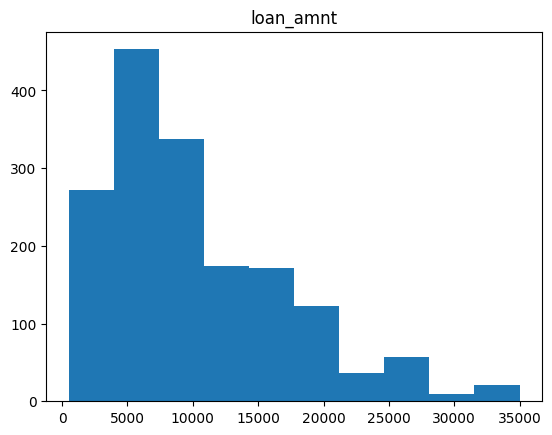

Categories chose: 10


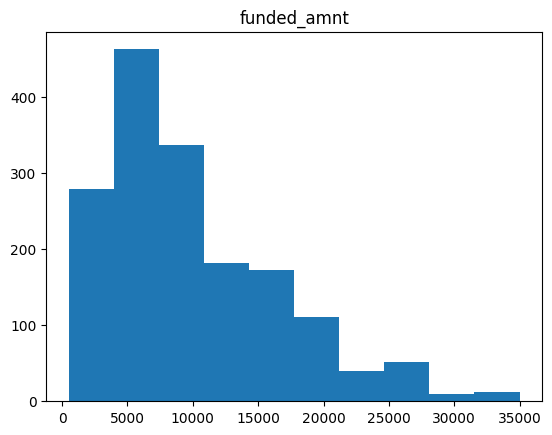

Categories chose: 8


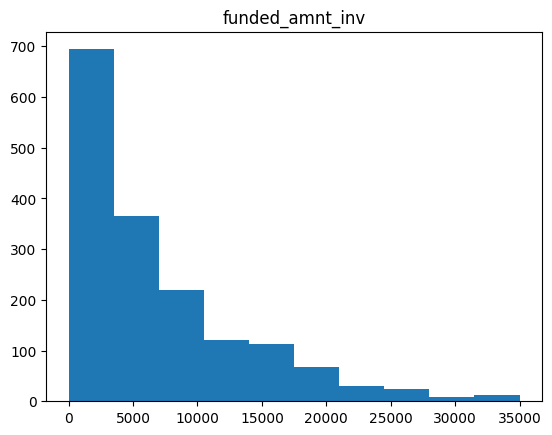

Categories chose: 5


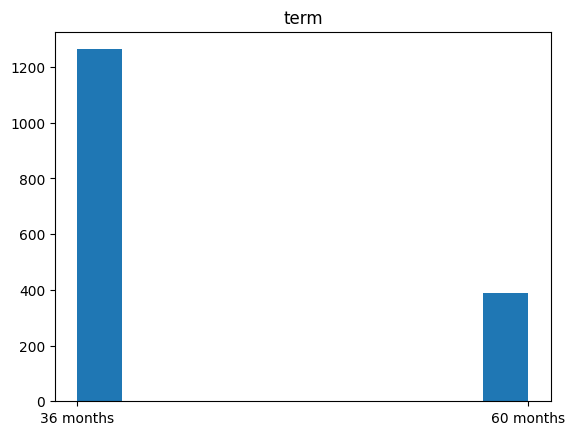

Fine for binarization.


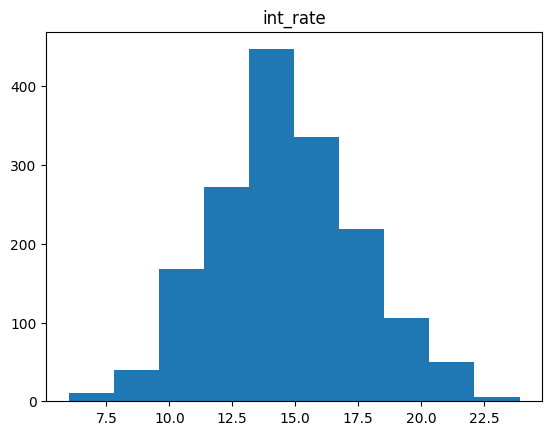

Categories chose: 5


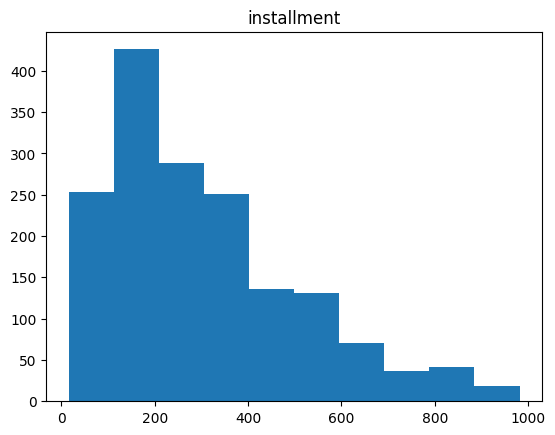

Categories chose: 5


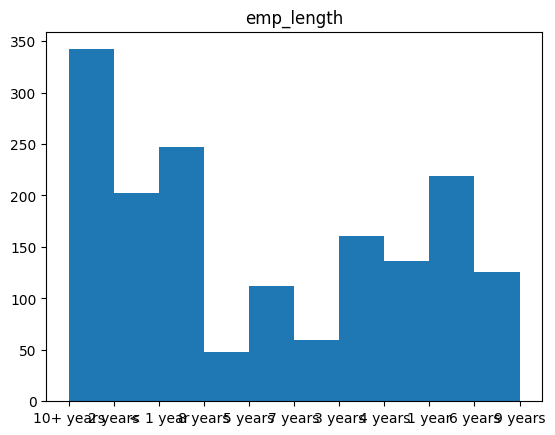

Fine for binarization.


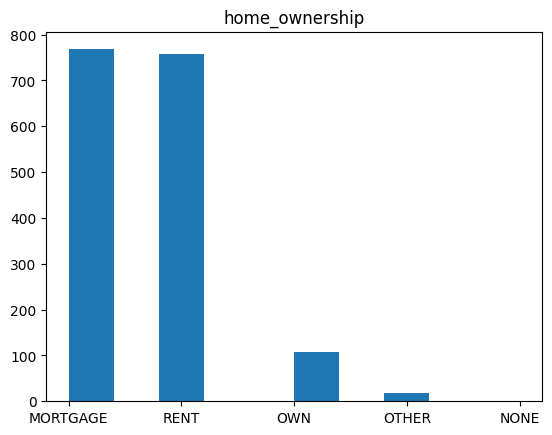

Fine for binarization.


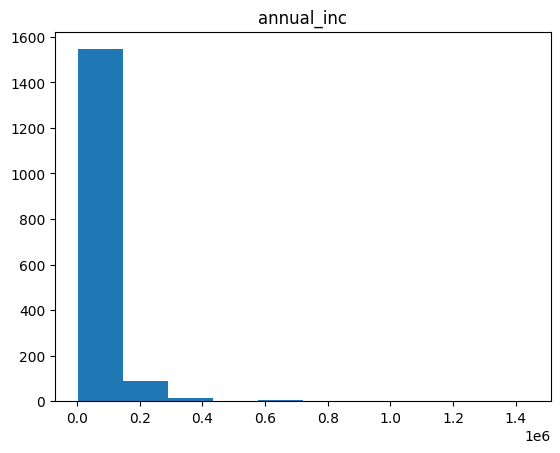

Categories chose: 7


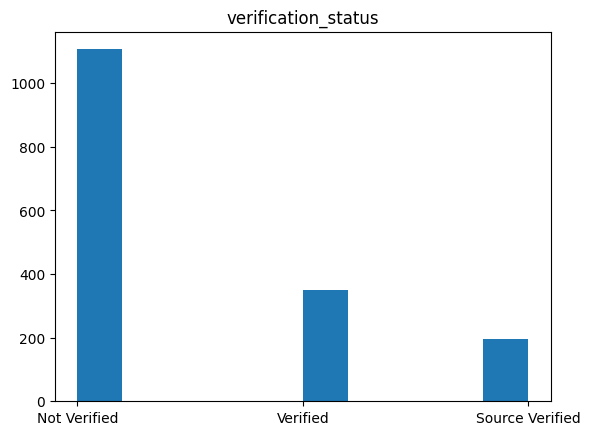

Fine for binarization.


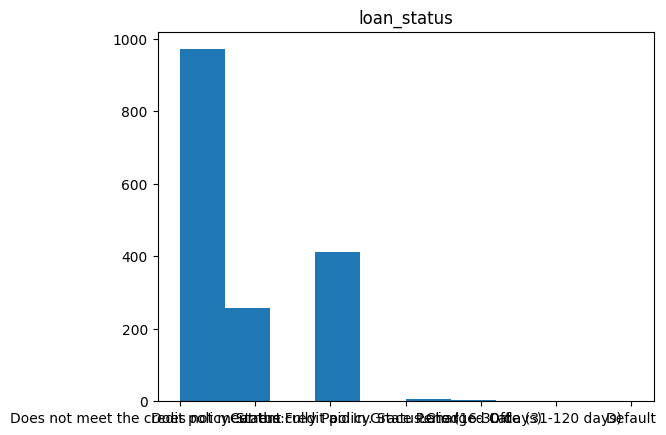

Fine for binarization.


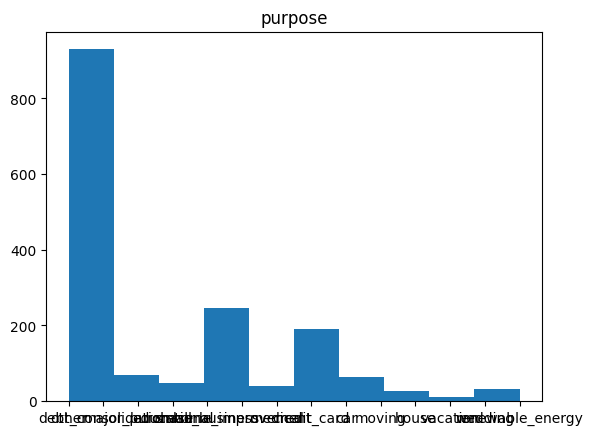

Fine for binarization.


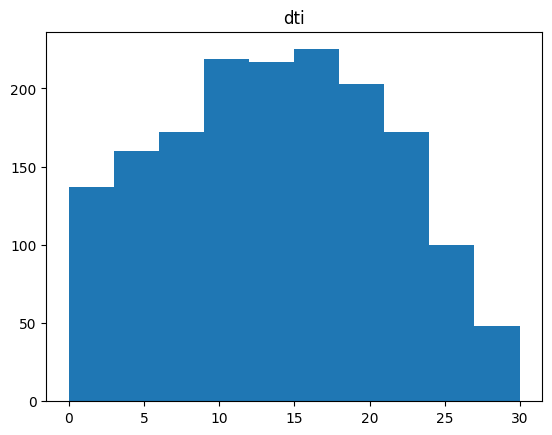

Categories chose: 5


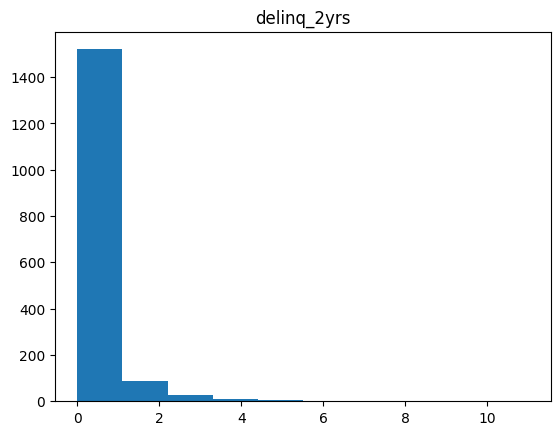

Fine for binarization.


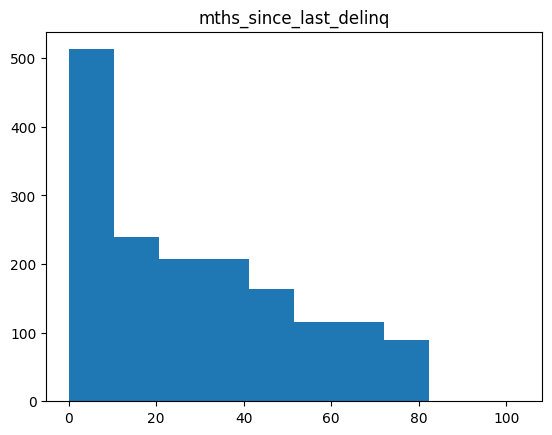

Bad column: mths_since_last_delinq


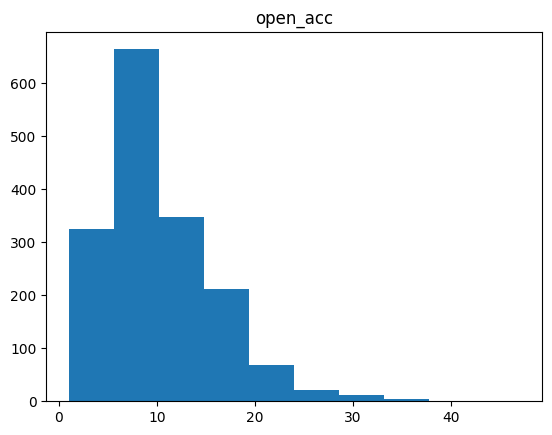

Categories chose: 5


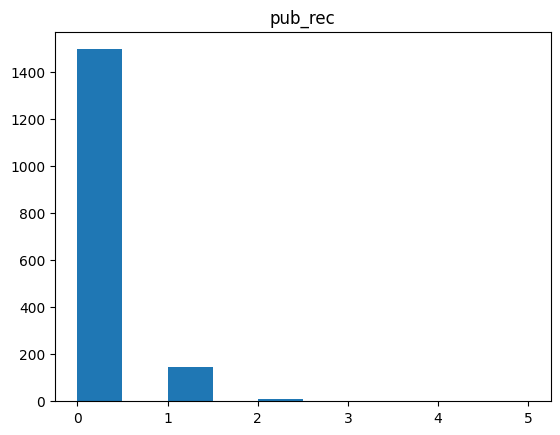

Fine for binarization.


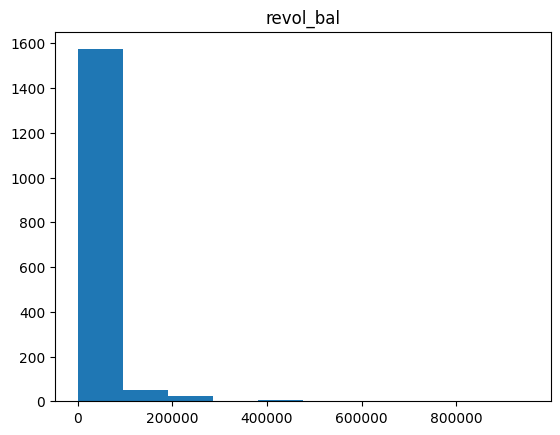

Categories chose: 6


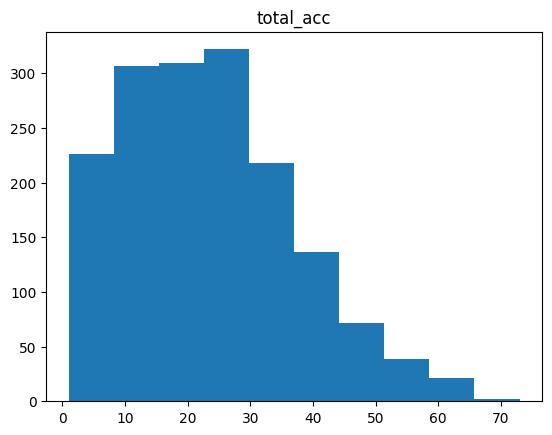

Categories chose: 5


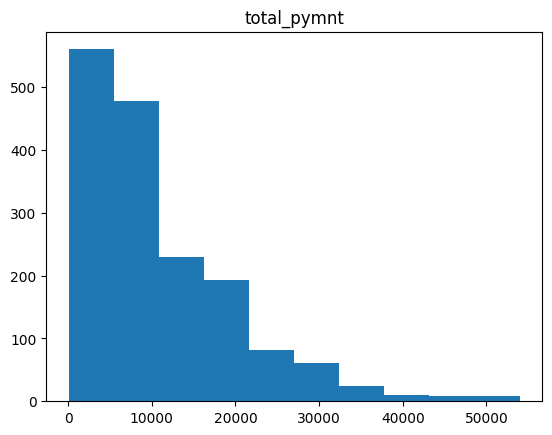

Categories chose: 4


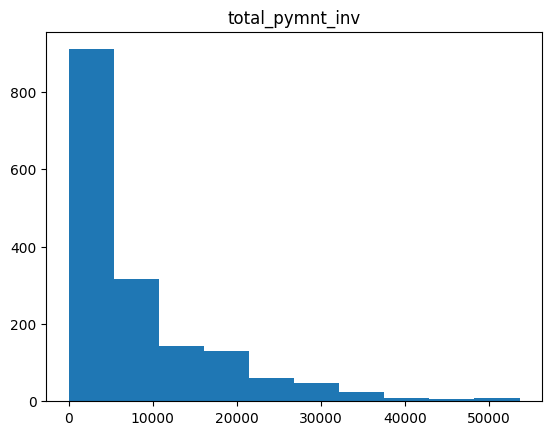

Categories chose: 5


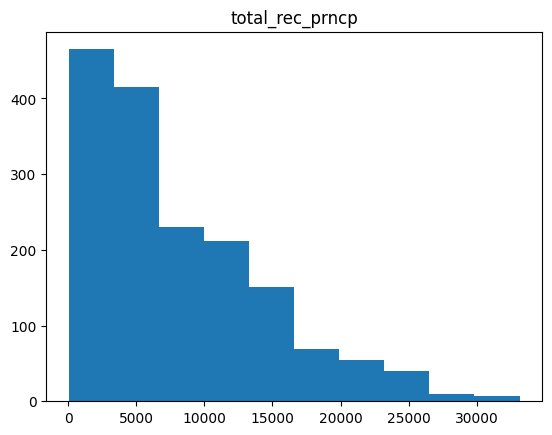

Categories chose: 3


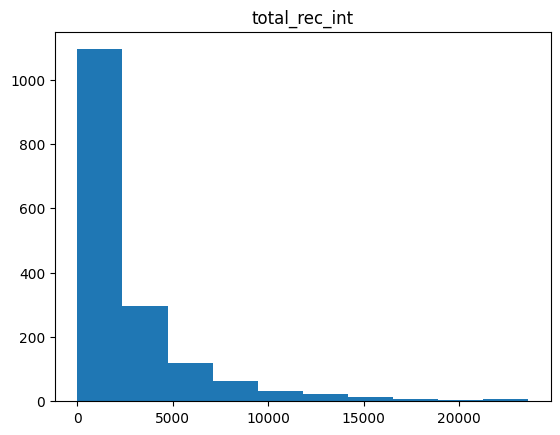

Categories chose: 5


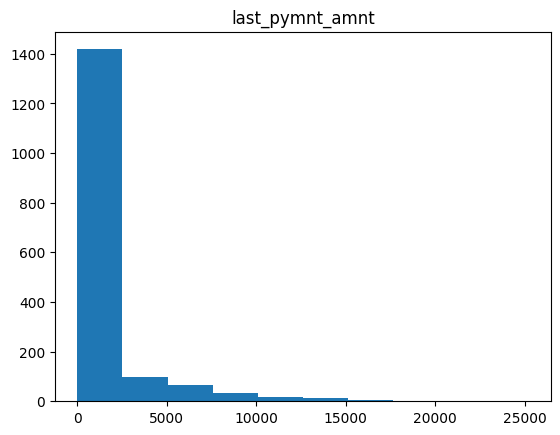

Categories chose: 4


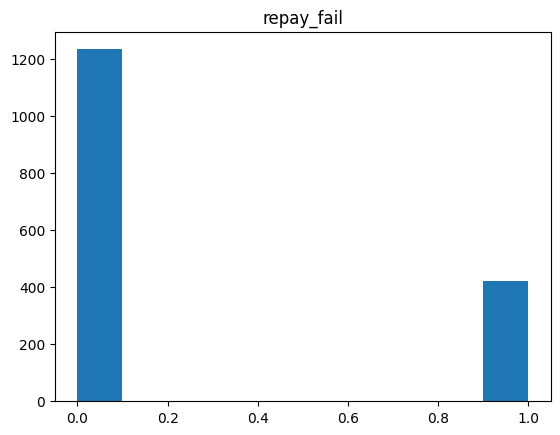

Fine for binarization.


In [23]:
df_l = df_l.drop(columns=bad_cols)
bad_cols = []
for col in df_l.columns:
    try:    
        plt.hist(df_l[col])
        plt.title(col)
        plt.show()
            
        if len(np.unique(df_l[col])) > 2:
            not_bin_cols.append(col)
        k = columns[col]
        if k:
            df_b[col] = pd.qcut(df_l[col], q=k, precision=3)
            print('Categories chose:', k)
        else:
            df_b[col] = df_l[col]
            print('Fine for binarization.')
    except:
        print('Bad column:', col)
        bad_cols.append(col)

In [32]:
df_b.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'last_pymnt_amnt', 'repay_fail'],
      dtype='object')

In [34]:
not_bin_cols.remove('mths_since_last_delinq')

In [35]:
not_bin_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'loan_status',
 'purpose',
 'dti',
 'delinq_2yrs',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'last_pymnt_amnt']

In [40]:
df_b['term'] = (df_b['term'] == df_b['term'].values[0])

In [41]:
df_b['term'].value_counts()

term
True     1264
False     389
Name: count, dtype: int64

In [42]:
df_bin = pd.get_dummies(df_b, columns=not_bin_cols).astype('bool')
df_bin.drop_duplicates(inplace=True)

In [43]:
df_bin

,term,repay_fail,"loan_amnt_(499.999, 2805.0]","loan_amnt_(2805.0, 4350.0]","loan_amnt_(4350.0, 5100.0]","loan_amnt_(5100.0, 6700.0]","loan_amnt_(6700.0, 8000.0]","loan_amnt_(8000.0, 10000.0]","loan_amnt_(10000.0, 12000.0]","loan_amnt_(12000.0, 15000.0]",...,"total_rec_prncp_(9730.41, 33127.85]","total_rec_int_(13.739, 606.47]","total_rec_int_(606.47, 1157.288]","total_rec_int_(1157.288, 1983.63]","total_rec_int_(1983.63, 3917.576]","total_rec_int_(3917.576, 23611.1]","last_pymnt_amnt_(-0.001, 155.76]","last_pymnt_amnt_(155.76, 327.06]","last_pymnt_amnt_(327.06, 748.08]","last_pymnt_amnt_(748.08, 25207.53]"
5,True,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
48,True,False,False,False,False,False,False,False,False,True,...,True,False,False,False,True,False,False,True,False,False
76,True,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
134,True,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
160,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38398,True,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
38409,True,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
38446,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
38454,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [44]:
df_bin.shape

(1653, 139)

In [45]:
df_bin['repay_fail'].value_counts(normalize=True)

repay_fail
False    0.745917
True     0.254083
Name: proportion, dtype: float64

In [46]:
df_positive = df_bin[df_bin['repay_fail'] == True].sample(n=300, random_state=3407)
df_negative = df_bin[df_bin['repay_fail'] == False].sample(n=700, random_state=3407)
df = pd.concat([df_positive, df_negative], axis=0)
df = df.sample(frac=1, random_state=3407)
df

,term,repay_fail,"loan_amnt_(499.999, 2805.0]","loan_amnt_(2805.0, 4350.0]","loan_amnt_(4350.0, 5100.0]","loan_amnt_(5100.0, 6700.0]","loan_amnt_(6700.0, 8000.0]","loan_amnt_(8000.0, 10000.0]","loan_amnt_(10000.0, 12000.0]","loan_amnt_(12000.0, 15000.0]",...,"total_rec_prncp_(9730.41, 33127.85]","total_rec_int_(13.739, 606.47]","total_rec_int_(606.47, 1157.288]","total_rec_int_(1157.288, 1983.63]","total_rec_int_(1983.63, 3917.576]","total_rec_int_(3917.576, 23611.1]","last_pymnt_amnt_(-0.001, 155.76]","last_pymnt_amnt_(155.76, 327.06]","last_pymnt_amnt_(327.06, 748.08]","last_pymnt_amnt_(748.08, 25207.53]"
4885,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
17181,True,True,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,True,False
18472,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
24251,True,True,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
16147,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37990,True,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1949,True,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,True,False
21518,True,False,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,True
20696,True,False,False,False,False,False,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False


In [47]:
df.shape

(1000, 139)

In [48]:
df['repay_fail'].value_counts(normalize=True)

repay_fail
False    0.7
True     0.3
Name: proportion, dtype: float64

In [49]:
features = df.drop(columns='repay_fail').columns
target = ['repay_fail']

In [50]:
X = df[features]
y = df[target]

# Testing models

In [51]:
scoring = {'accuracy' : make_scorer(accuracy_score),
           'f1_macro' : make_scorer(f1_score, average='macro'),
           'f1_binary' : make_scorer(f1_score),
          }

kfold = StratifiedKFold(n_splits=10, random_state=3407, shuffle=True)

In [52]:
def print_results(results):
    acc = np.round(np.mean(results['test_accuracy']), 4) 
    f1_m = np.round(np.mean(results['test_f1_macro']), 4)
    f1_b = np.round(np.mean(results['test_f1_binary']), 4)
    print(f'Accuracy = {acc:0.4f}, F1_macro = {f1_m:0.4f}, F1_binary = {f1_b:0.4f}')  

In [53]:
import warnings
warnings.filterwarnings('ignore')

# Standard models

### Logistic regression

In [54]:
parameters = {'C' : np.linspace(1,5,101)}

model = LogisticRegression()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 101 candidates, totalling 1010 fits


{'C': 1.0}

In [55]:
model = LogisticRegression(C=best.best_params_['C'])
results = cross_validate(estimator=model,
                         X=X, y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.9940, F1_macro = 0.9928, F1_binary = 0.9898


### K-Nearest Neighbours

In [57]:
parameters = {'n_neighbors' : range(3, 20, 1)}

model = KNeighborsClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )

best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 17 candidates, totalling 170 fits


{'n_neighbors': 9}

In [58]:
model = KNeighborsClassifier(n_neighbors=best.best_params_['n_neighbors'])
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.9390, F1_macro = 0.9220, F1_binary = 0.8856


### Naive Bayes

In [59]:
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

model = GaussianNB()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.012328467394420659}

In [60]:
model = GaussianNB(var_smoothing=best.best_params_['var_smoothing'])

results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.9990, F1_macro = 0.9988, F1_binary = 0.9983


### Decision tree

In [61]:
parameters = {'min_samples_split' : range(2,21,2),
              'max_depth' : range(2,13,2),
              'criterion' : ['gini', 'entropy']
             }

model = DecisionTreeClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}

In [62]:
model = DecisionTreeClassifier(
    max_depth=best.best_params_['max_depth'], 
    min_samples_split=best.best_params_['min_samples_split'],
    criterion=best.best_params_['criterion']
)
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.9990, F1_macro = 0.9988, F1_binary = 0.9983


### RandomForest

In [63]:
parameters = {'n_estimators' : range(5,51,10),
              'min_samples_split' : range(2,13,2),
              'max_depth' : range(4,11,2),
              'criterion' : ['gini', 'entropy']
             }
model = RandomForestClassifier()

best = GridSearchCV(estimator=model, 
                    param_grid=parameters, 
                    cv=kfold,
                    verbose=1, 
                    scoring=scoring,
                    refit='f1_binary'
                   )
best.fit(X, y)
best.best_params_

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_split': 12,
 'n_estimators': 15}

In [64]:
model = RandomForestClassifier(
    n_estimators=best.best_params_['n_estimators'],
    min_samples_split=best.best_params_['min_samples_split'],
    max_depth=best.best_params_['max_depth'],
    criterion=best.best_params_['criterion']
)
results = cross_validate(estimator=model,
                         X=X,
                         y=y,
                         cv=kfold,
                         scoring=scoring
                         )
print_results(results)

Accuracy = 0.9920, F1_macro = 0.9903, F1_binary = 0.9862


# Lazy FCA

Due to the multilabel output of **BinarizedBinaryClassifier** (**1** for **True**, **0** for **false** and **-1** for **undefined**) we cannot utilize **f1_score** with **average='binary'**. Therefore, a function that interprets **undefined** as misclassification was implemented.

In [65]:
def compare_with_binary_f1(y_true, y_pred):
    y_tmp = np.concatenate(
        (np.array(y_true)[:,None],np.array(y_pred)[:,None]),
        axis=1
    )
    df_tmp = pd.DataFrame(y_tmp, columns=['y_true','y_pred'])
    df_tmp.y_true = df_tmp.y_true.astype(bool)
    df_tmp['y_new']= ~df_tmp.loc[df_tmp.y_pred==-1]['y_true']
    df_tmp.loc[df_tmp.y_pred!=-1, 'y_new'] = df_tmp.loc[df_tmp.y_pred!=-1,'y_pred'].astype(bool) 
    df_tmp.y_new = df_tmp.y_new.astype(bool)
    return(f1_score(df_tmp.y_true, df_tmp.y_new))

In [66]:
def results_fca(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    accuracy = accuracy_score(y_true, y_pred)
    f1_binary = compare_with_binary_f1(y_true, y_pred)
    return (accuracy, f1, f1_binary)  

## BinarizedBinaryClassifier

**BinarizedBinaryClassifier** is not a **scikit** model, so **GridSearchCV** and **cross_validate** from **scikit** do not support it. Thus, we check desired parameters in **for**  loops.

In [69]:
parameters = {'alpha' : np.linspace(0, 1, 5),
              'method': ['standard','standard-support','ratio-support'],
             }

n = kfold.get_n_splits(X)

f1_best = 0
alpha_best = 0.
method_best = 'standard'

for method in parameters['method']:
    for alpha in parameters['alpha']:
        
        f1 = [0 for i in range(n)]
        for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
            bin_cls = fcalc.classifier.BinarizedBinaryClassifier(
                X.iloc[train_index].values, 
                y.iloc[train_index][y.columns[0]].values,
                method=method,
                alpha=alpha
            )
            bin_cls.predict(X.iloc[test_index].values)
            f1[i] = f1_score(y.iloc[test_index], bin_cls.predictions, average='macro')
            print(f"[CV {i+1}/{n}] method={method}, alpha={alpha:0.2f}, f1_macro={f1[i]:0.4f}") 
                    
        f1_mean = np.mean(f1)
        print(f'f1_mean = {f1_mean:0.4f}\n')
        if(f1_mean > f1_best):
            f1_best = f1_mean
            alpha_best = alpha
            method_best = method
            
print(f"f1_best={f1_best:0.4f}, method={method_best}, alpha={alpha_best:0.2f}")

[CV 1/10] method=standard, alpha=0.00, f1_macro=1.0000
[CV 2/10] method=standard, alpha=0.00, f1_macro=1.0000
[CV 3/10] method=standard, alpha=0.00, f1_macro=0.9880
[CV 4/10] method=standard, alpha=0.00, f1_macro=0.9757
[CV 5/10] method=standard, alpha=0.00, f1_macro=1.0000
[CV 6/10] method=standard, alpha=0.00, f1_macro=1.0000
[CV 7/10] method=standard, alpha=0.00, f1_macro=0.9880
[CV 8/10] method=standard, alpha=0.00, f1_macro=0.9880
[CV 9/10] method=standard, alpha=0.00, f1_macro=1.0000
[CV 10/10] method=standard, alpha=0.00, f1_macro=0.9880
f1_mean = 0.9928

[CV 1/10] method=standard, alpha=0.25, f1_macro=0.7632
[CV 2/10] method=standard, alpha=0.25, f1_macro=0.7254
[CV 3/10] method=standard, alpha=0.25, f1_macro=0.4671
[CV 4/10] method=standard, alpha=0.25, f1_macro=0.4625
[CV 5/10] method=standard, alpha=0.25, f1_macro=0.7726
[CV 6/10] method=standard, alpha=0.25, f1_macro=0.6970
[CV 7/10] method=standard, alpha=0.25, f1_macro=0.6673
[CV 8/10] method=standard, alpha=0.25, f1_macr

In [70]:
f1 = [0 for i in range(n)]
accuracy = [0 for i in range(n)]
f1_binary = [0 for i in range(n)]

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    bin_cls = fcalc.classifier.BinarizedBinaryClassifier(
        X.iloc[train_index].values, 
        y.iloc[train_index][y.columns[0]].values,
        method=method_best,
        alpha=alpha_best
    )
    bin_cls.predict(X.iloc[test_index].values)
    
    accuracy[i], f1[i], f1_binary[i] = results_fca(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions)
    
    print(f"[CV {i+1}/{n}] method={method_best}, alpha={alpha_best:0.2f}", 
          f"accuracy={accuracy[i]:0.4f}, f1_macro={f1[i]:0.4f}, f1_binary={f1_binary[i]:0.4f}")

f1_mean = np.mean(f1)
accuracy_mean = np.mean(accuracy)
f1_binary_mean = np.mean(f1_binary)

print(f"\n accuracy={accuracy_mean:0.4f}, f1_macro={f1_mean:0.4f}, f1_binary={f1_binary_mean:0.4f}")

[CV 1/10] method=standard-support, alpha=0.00 accuracy=1.0000, f1_macro=1.0000, f1_binary=1.0000
[CV 2/10] method=standard-support, alpha=0.00 accuracy=1.0000, f1_macro=1.0000, f1_binary=1.0000
[CV 3/10] method=standard-support, alpha=0.00 accuracy=1.0000, f1_macro=1.0000, f1_binary=1.0000
[CV 4/10] method=standard-support, alpha=0.00 accuracy=0.9800, f1_macro=0.9757, f1_binary=0.9655
[CV 5/10] method=standard-support, alpha=0.00 accuracy=1.0000, f1_macro=1.0000, f1_binary=1.0000
[CV 6/10] method=standard-support, alpha=0.00 accuracy=1.0000, f1_macro=1.0000, f1_binary=1.0000
[CV 7/10] method=standard-support, alpha=0.00 accuracy=0.9900, f1_macro=0.9880, f1_binary=0.9831
[CV 8/10] method=standard-support, alpha=0.00 accuracy=0.9900, f1_macro=0.9880, f1_binary=0.9831
[CV 9/10] method=standard-support, alpha=0.00 accuracy=1.0000, f1_macro=1.0000, f1_binary=1.0000
[CV 10/10] method=standard-support, alpha=0.00 accuracy=0.9900, f1_macro=0.9880, f1_binary=0.9831

 accuracy=0.9950, f1_macro=0

## PatternBinaryClassifier

In [72]:
parameters = {'alpha' : np.linspace(0, 0.4, 5),
              'method': ['standard','standard-support','ratio-support'],
             }

n = kfold.get_n_splits(X)

f1_best_p = 0
alpha_best_p = 0.
method_best_p = 'standard'

for method in parameters['method']:
    for alpha in parameters['alpha']:
        
        f1 = [0 for i in range(n)]
        for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
            bin_cls = fcalc.classifier.PatternBinaryClassifier(
                X.iloc[train_index].values, 
                y.iloc[train_index][y.columns[0]].values,
                method=method,
                alpha=alpha
            )
            bin_cls.predict(X.iloc[test_index].values)
            f1[i] = f1_score(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions, average='macro')
            print(f"[CV {i+1}/{n}] method={method}, alpha={alpha:0.2f}, f1_macro={f1[i]:0.4f}") 
                    
        f1_mean = np.mean(f1)
        print(f'f1_mean = {f1_mean:0.4f}\n')
        if(f1_mean > f1_best_p):
            f1_best_p = f1_mean
            alpha_best_p = alpha
            method_best_p = method
            
print(f"f1_best={f1_best_p:0.4f}, method={method_best_p}, alpha={alpha_best_p:0.2f}")

[CV 1/10] method=standard, alpha=0.00, f1_macro=0.4365
[CV 2/10] method=standard, alpha=0.00, f1_macro=0.4694
[CV 3/10] method=standard, alpha=0.00, f1_macro=0.4781
[CV 4/10] method=standard, alpha=0.00, f1_macro=0.4665
[CV 5/10] method=standard, alpha=0.00, f1_macro=0.4411
[CV 6/10] method=standard, alpha=0.00, f1_macro=0.4805
[CV 7/10] method=standard, alpha=0.00, f1_macro=0.3789
[CV 8/10] method=standard, alpha=0.00, f1_macro=0.4210
[CV 9/10] method=standard, alpha=0.00, f1_macro=0.4970
[CV 10/10] method=standard, alpha=0.00, f1_macro=0.4849
f1_mean = 0.4554

[CV 1/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 2/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 3/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 4/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 5/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 6/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 7/10] method=standard, alpha=0.10, f1_macro=0.0000
[CV 8/10] method=standard, alpha=0.10, f1_macr

In [73]:
f1 = [0 for i in range(n)]
accuracy = [0 for i in range(n)]
f1_binary = [0 for i in range(n)]

for i, (train_index, test_index) in enumerate(kfold.split(X, y)):
    bin_cls = fcalc.classifier.PatternBinaryClassifier(
        X.iloc[train_index].values, 
        y.iloc[train_index][y.columns[0]].values,
        method=method_best_p,
        alpha=alpha_best_p
    )
    bin_cls.predict(X.iloc[test_index].values)
    
    accuracy[i], f1[i], f1_binary[i] = results_fca(y.iloc[test_index][y.columns[0]].values, bin_cls.predictions)
    
    print(f"[CV {i+1}/{n}] method={method_best_p}, alpha={alpha_best_p:0.2f}", 
          f"accuracy={accuracy[i]:0.4f}, f1_macro={f1[i]:0.4f}, f1_binary={f1_binary[i]:0.4f}")

f1_mean = np.mean(f1)
accuracy_mean = np.mean(accuracy)
f1_binary_mean = np.mean(f1_binary)

print(f"\n accuracy={accuracy_mean:0.4f}, f1_macro={f1_mean:0.4f}, f1_binary={f1_binary_mean:0.4f}")

[CV 1/10] method=ratio-support, alpha=0.00 accuracy=0.8100, f1_macro=0.5378, f1_binary=0.7077
[CV 2/10] method=ratio-support, alpha=0.00 accuracy=0.7700, f1_macro=0.4853, f1_binary=0.5660
[CV 3/10] method=ratio-support, alpha=0.00 accuracy=0.7400, f1_macro=0.4773, f1_binary=0.5938
[CV 4/10] method=ratio-support, alpha=0.00 accuracy=0.7400, f1_macro=0.4793, f1_binary=0.5938
[CV 5/10] method=ratio-support, alpha=0.00 accuracy=0.7400, f1_macro=0.4872, f1_binary=0.6176
[CV 6/10] method=ratio-support, alpha=0.00 accuracy=0.7200, f1_macro=0.5014, f1_binary=0.6410
[CV 7/10] method=ratio-support, alpha=0.00 accuracy=0.6600, f1_macro=0.4139, f1_binary=0.4688
[CV 8/10] method=ratio-support, alpha=0.00 accuracy=0.6700, f1_macro=0.4378, f1_binary=0.5217
[CV 9/10] method=ratio-support, alpha=0.00 accuracy=0.7800, f1_macro=0.5250, f1_binary=0.6562
[CV 10/10] method=ratio-support, alpha=0.00 accuracy=0.7600, f1_macro=0.4937, f1_binary=0.6471

 accuracy=0.7390, f1_macro=0.4839, f1_binary=0.6014
